# House price prediction

#### `import libraries`

In [2]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

# load dataset

In [3]:
data=pd.read_csv('global_house_purchase_dataset.csv')

In [4]:
data.head(5)

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,1,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,...,10745,193949,15,6545,218986,0.16,1,5,6,0
1,2,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
2,3,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,...,21914,307953,30,2510,437151,0.09,6,8,1,0
3,4,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
4,5,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0


#### `shape`

In [5]:
data.shape

(200000, 25)

#### `duplicate value`

In [6]:
data.duplicated().sum()

0

# data cleaning

In [8]:
def clean_data(df):
    return(
        df
        .drop(columns=['property_id', 'customer_salary','loan_amount','loan_tenure_years',
                                 'monthly_expenses','down_payment',"emi_to_income_ratio",
                                 "satisfaction_score",'neighbourhood_rating','connectivity_score','decision'])

         .assign(
            country= lambda df_:(                 #    country 
                  df_
                  .country
                  .str.lower()                    # first letter make small 
             )
        )
        .assign(
            city= lambda df_:(                       #   city
                  df_
                  .city
                  .str.lower()
             )
        )
        .assign(
            property_type= lambda df_:(                # property_type
                  df_
                  .property_type
                  .str.lower()
             )
        )
        .assign(
            furnishing_status= lambda df_:(           # furnishing_status
                  df_
                  .furnishing_status
                  .str.lower()
             )
        )
        
       
        

        

    )
             

In [9]:
dataset=clean_data(data)

In [10]:
dataset.head()

,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,bathrooms,garage,garden,crime_cases_reported,legal_cases_on_property
0,france,marseille,farmhouse,semi-furnished,991,412935,1989,6,6,2,1,1,1,0
1,south africa,cape town,apartment,semi-furnished,1244,224538,1990,4,8,8,1,1,1,1
2,south africa,johannesburg,farmhouse,semi-furnished,4152,745104,2019,5,2,1,1,1,0,0
3,germany,frankfurt,farmhouse,semi-furnished,3714,1110959,2008,1,3,3,0,1,0,0
4,south africa,johannesburg,townhouse,fully-furnished,531,99041,2007,6,3,3,1,1,3,1


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   country                  200000 non-null  object
 1   city                     200000 non-null  object
 2   property_type            200000 non-null  object
 3   furnishing_status        200000 non-null  object
 4   property_size_sqft       200000 non-null  int64 
 5   price                    200000 non-null  int64 
 6   constructed_year         200000 non-null  int64 
 7   previous_owners          200000 non-null  int64 
 8   rooms                    200000 non-null  int64 
 9   bathrooms                200000 non-null  int64 
 10  garage                   200000 non-null  int64 
 11  garden                   200000 non-null  int64 
 12  crime_cases_reported     200000 non-null  int64 
 13  legal_cases_on_property  200000 non-null  int64 
dtypes: int64(10), object

#### `observation`

- Dataset has 200,000 rows and 14 columns
- No missing values in any column
- 4 categorical features: country, city, property_type, furnishing_status
- 10 numerical features: size, price, year built, rooms, amenities, legal/crime data
- Data types: int64 (10) and object (4)
- Memory usage is approximately 21.4 MB

#### null value

In [12]:
(dataset.isnull().sum() / len(dataset)) * 100

country                    0.0
city                       0.0
property_type              0.0
furnishing_status          0.0
property_size_sqft         0.0
price                      0.0
constructed_year           0.0
previous_owners            0.0
rooms                      0.0
bathrooms                  0.0
garage                     0.0
garden                     0.0
crime_cases_reported       0.0
legal_cases_on_property    0.0
dtype: float64

#### numerical features  observations

In [13]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
property_size_sqft,200000.0,3.195633e+03,1613.322287,400.0,1802.0,3190.0,4589.0,6000.0
price,200000.0,1.215365e+06,823663.258915,56288.0,565989.5,1023429.0,1725556.5,4202732.0
constructed_year,200000.0,1.991488e+03,18.494064,1960.0,1975.0,1991.0,2008.0,2023.0
previous_owners,200000.0,3.001370e+00,2.002198,0.0,1.0,3.0,5.0,6.0
rooms,200000.0,4.513855e+00,2.295669,1.0,3.0,5.0,7.0,8.0
bathrooms,200000.0,2.760030e+00,1.840959,1.0,1.0,2.0,4.0,8.0
garage,200000.0,4.993500e-01,0.500001,0.0,0.0,0.0,1.0,1.0
garden,200000.0,5.002150e-01,0.500001,0.0,0.0,1.0,1.0,1.0
crime_cases_reported,200000.0,1.229065e+00,1.185336,0.0,0.0,1.0,2.0,10.0
legal_cases_on_property,200000.0,2.489200e-01,0.432388,0.0,0.0,0.0,0.0,1.0


#### numerical features  observations

- Property size averages ~3,196 sqft, ranging from 400 to 6,000 sqft
- Property price has a mean of ~1.21M with a wide spread (≈ 56k to 4.2M), indicating high variance
- Construction year centers around 1991, with most properties built between 1975–2008
- Properties typically have 4–5 rooms and 2–3 bathrooms
- Previous owners median is 3, with a maximum of 6
- Garage and garden are binary features, present in ~50% of properties
- Crime cases reported are generally low (median 1, max 10)
- Legal cases on property are rare (mostly 0)

#### categorical features

In [14]:
dataset.describe(include="O").T

,count,unique,top,freq
country,200000,13,france,15628
city,200000,40,singapore,15278
property_type,200000,6,farmhouse,33518
furnishing_status,200000,3,fully-furnished,66829


- All categorical features have 200,000 records (no missing values)
- Country: 13 unique values, most common is France (~15.6k entries)
- City: 40 unique values, most frequent is Singapore (~15.3k entries)
- Property type: 6 categories, with Farmhouse as the most common
- Furnishing status: 3 categories, Fully-furnished is the most frequent option

#### price vs city

<Figure size 9000x500 with 0 Axes>

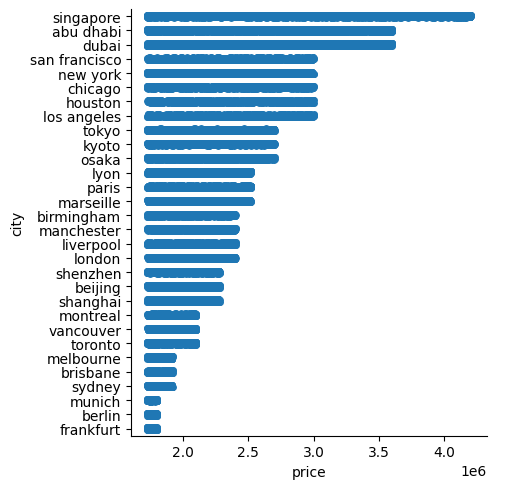

In [16]:
# top 200 increasing amounts
p=dataset.sort_values(by="price",ascending=False)
top=p.head(50000)
top=top


plt.figure(figsize=(90,5))
sns.catplot(x="price",y="city",kind="strip",data=top)

#### `correlation heatmap`

<Axes: >

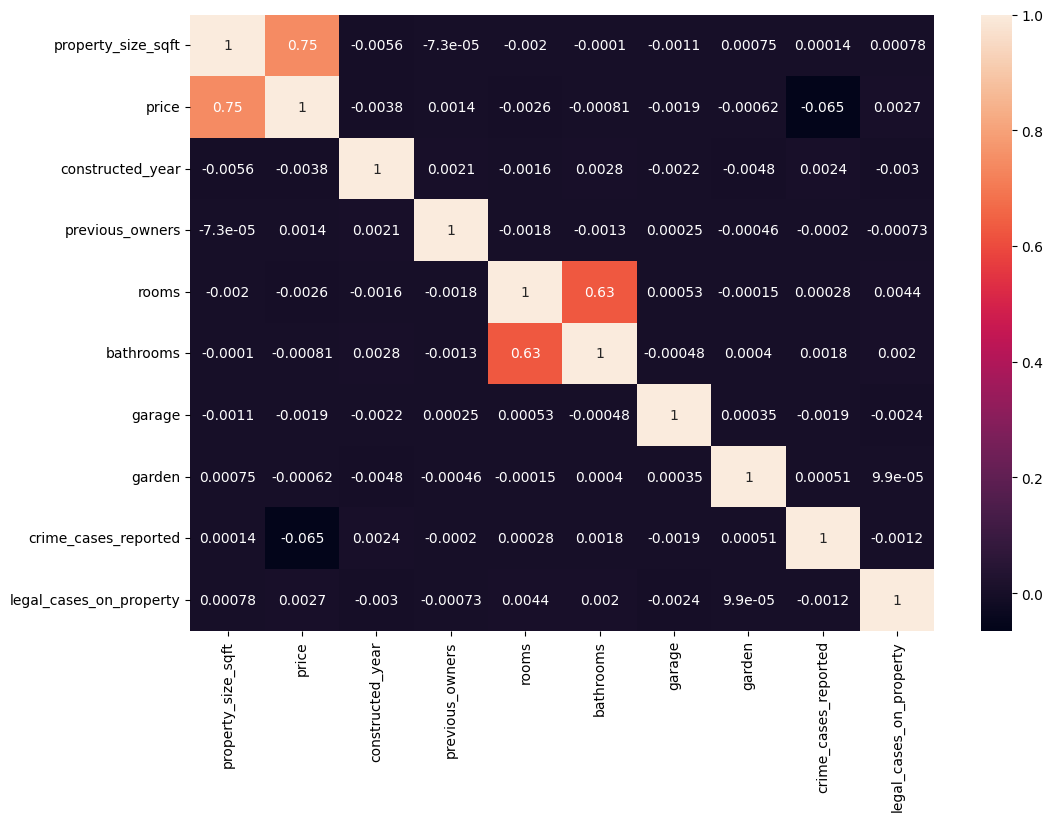

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=dataset.corr(numeric_only='TRUE'),annot=True)

#### `observation correlation heatmap:`

- Property size vs Price shows a strong positive correlation (~0.75)
→ Larger properties tend to be more expensive.

- Rooms vs Bathrooms have a moderate positive correlation (~0.63)
→ Homes with more rooms usually have more bathrooms.

- Price vs Crime cases shows a weak negative correlation (~-0.06)
→ Slight tendency for higher-priced properties to be in lower-crime areas, but the effect is very small.

- Constructed year has near-zero correlation with price and size
→ Newer or older construction does not strongly impact price or size in this dataset.

- Previous owners has almost no correlation with other features
→ Ownership history does not significantly influence price or property characteristics.

- Garage and Garden show negligible correlations with price and size
→ Their presence is mostly independent of other variables.

- Legal cases on property and crime cases reported have very weak correlations with all features
→ These factors are largely independent in this data.

- Overall, most features are weakly correlated, indicating low multicollinearity, except:
- property_size_sqft ↔ price

### pairplot

<Figure size 2000x1000 with 0 Axes>

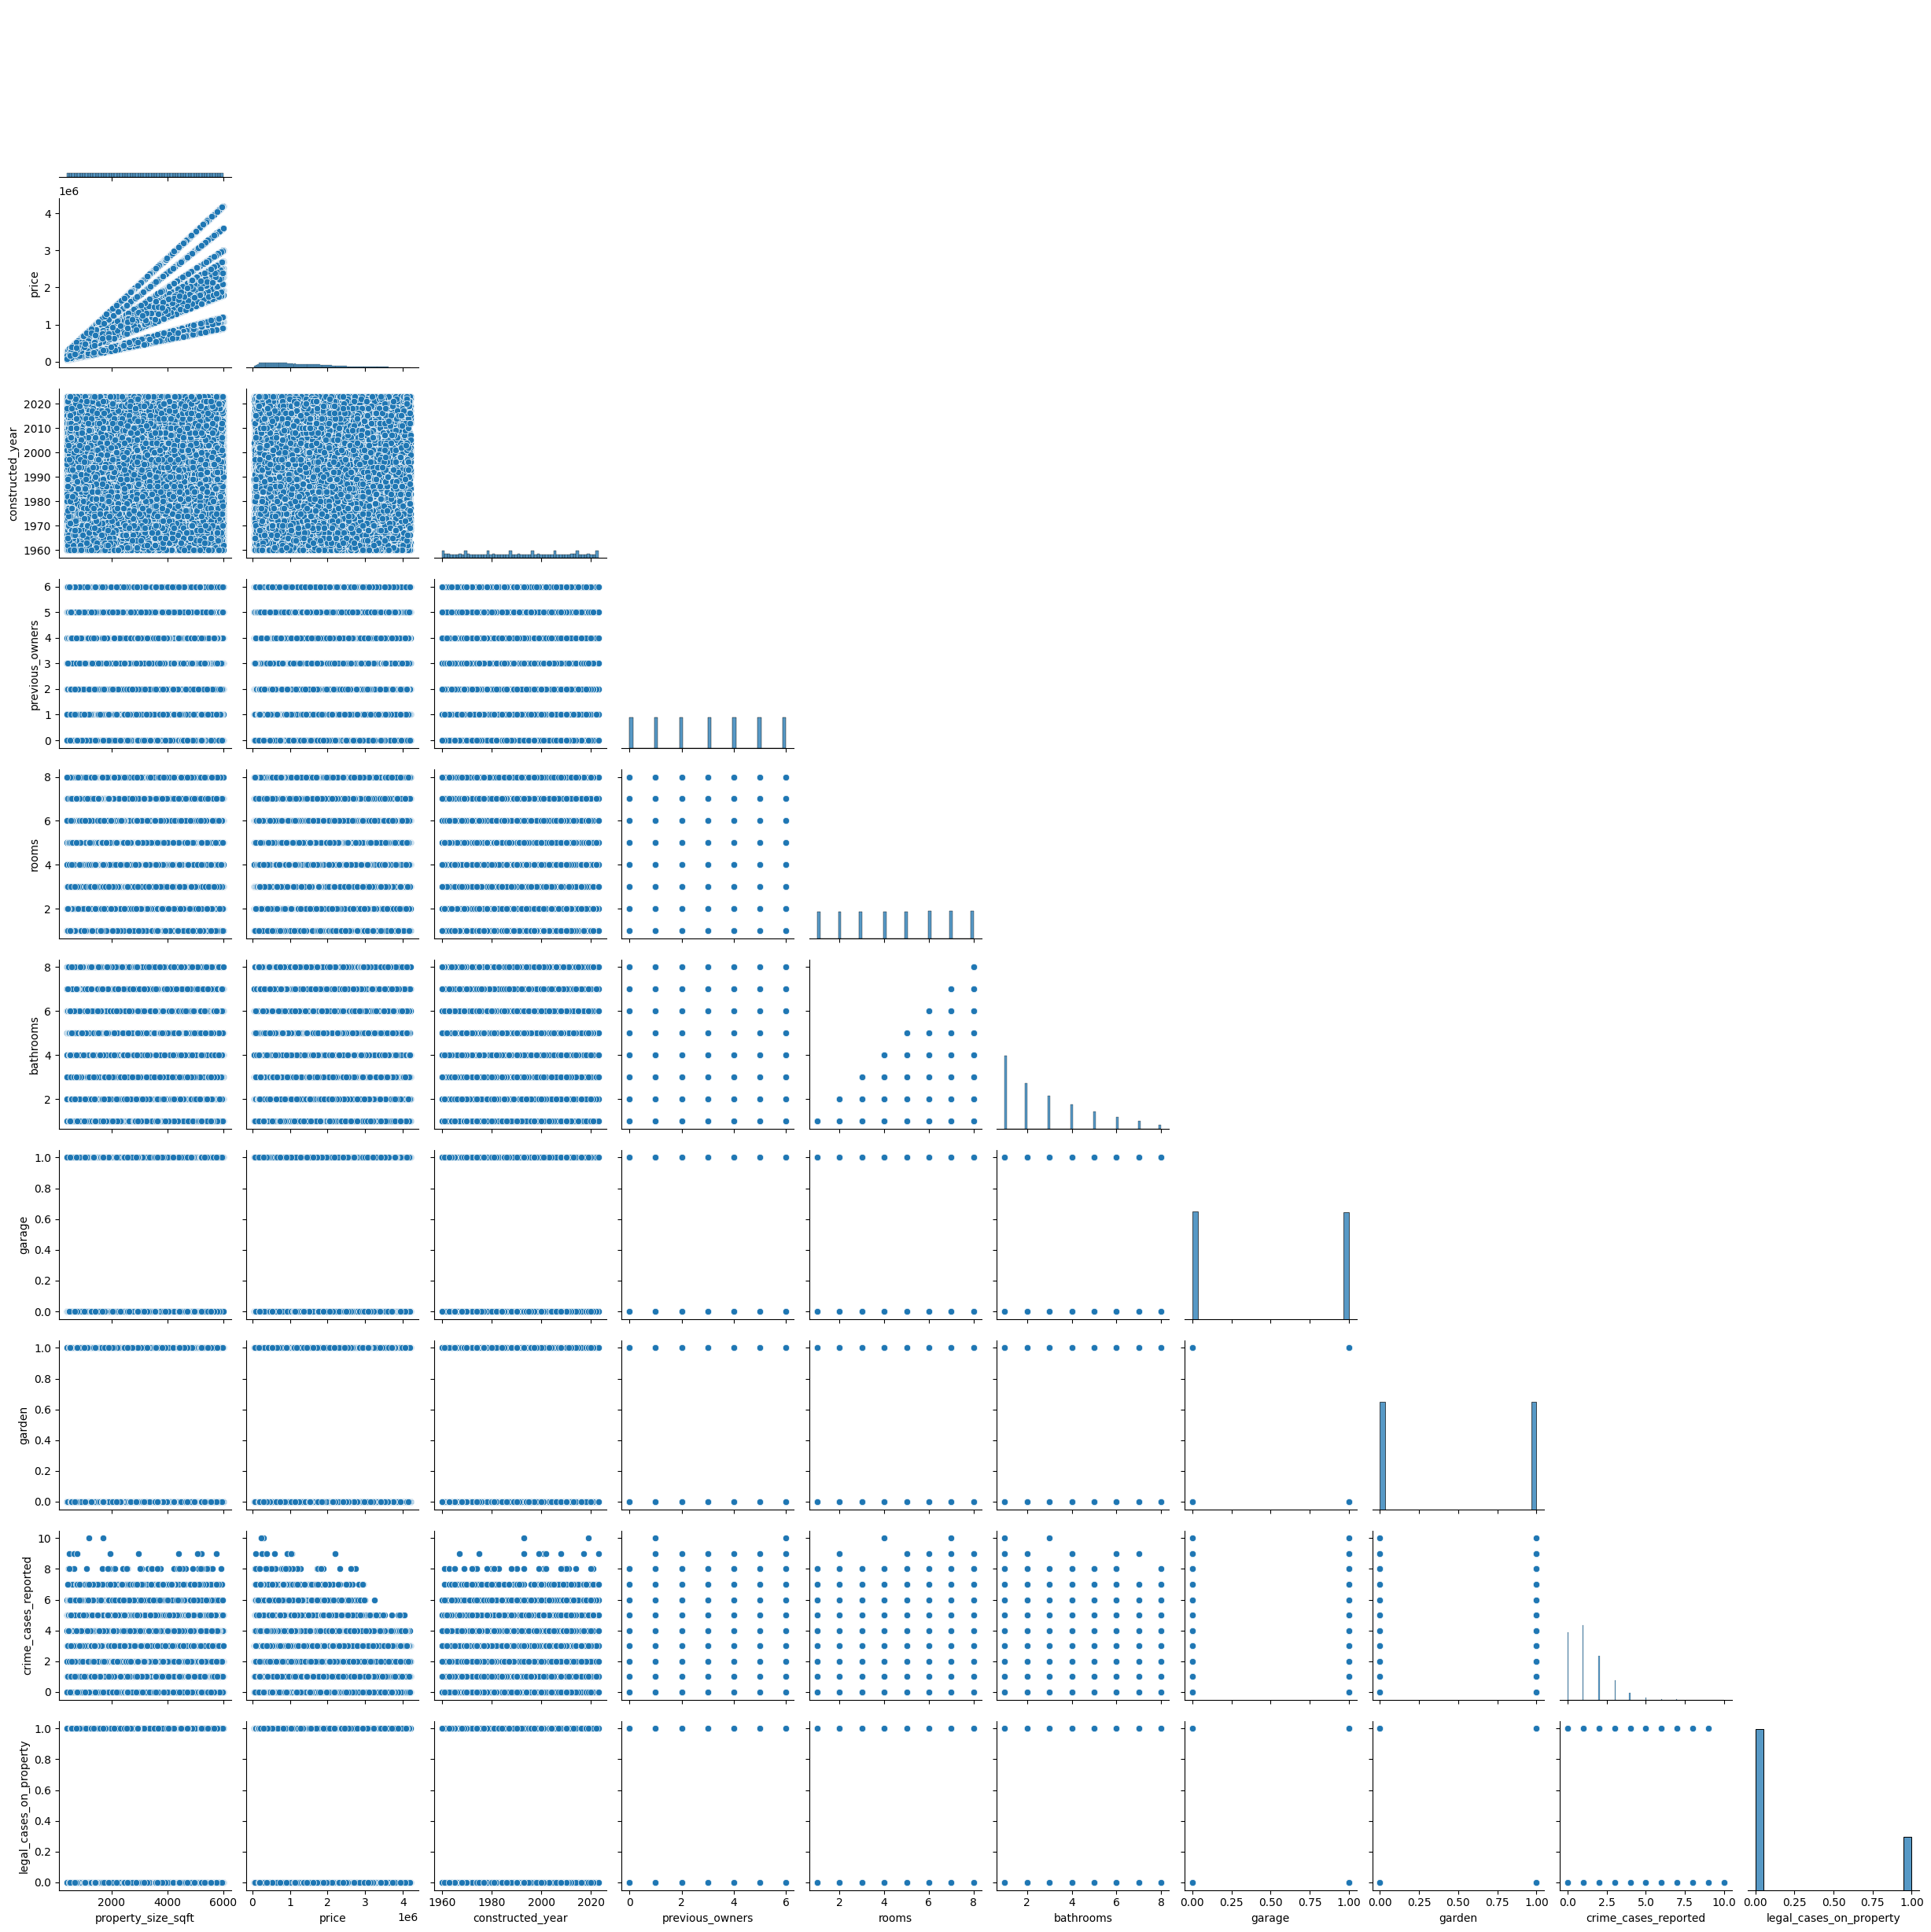

In [17]:
plt.figure(figsize=(20,10))
sns.pairplot(dataset,corner=True)

In [22]:
dataset.select_dtypes(include="int").columns

Index(['property_size_sqft', 'price', 'constructed_year', 'previous_owners',
       'rooms', 'bathrooms', 'garage', 'garden', 'crime_cases_reported',
       'legal_cases_on_property'],
      dtype='object')

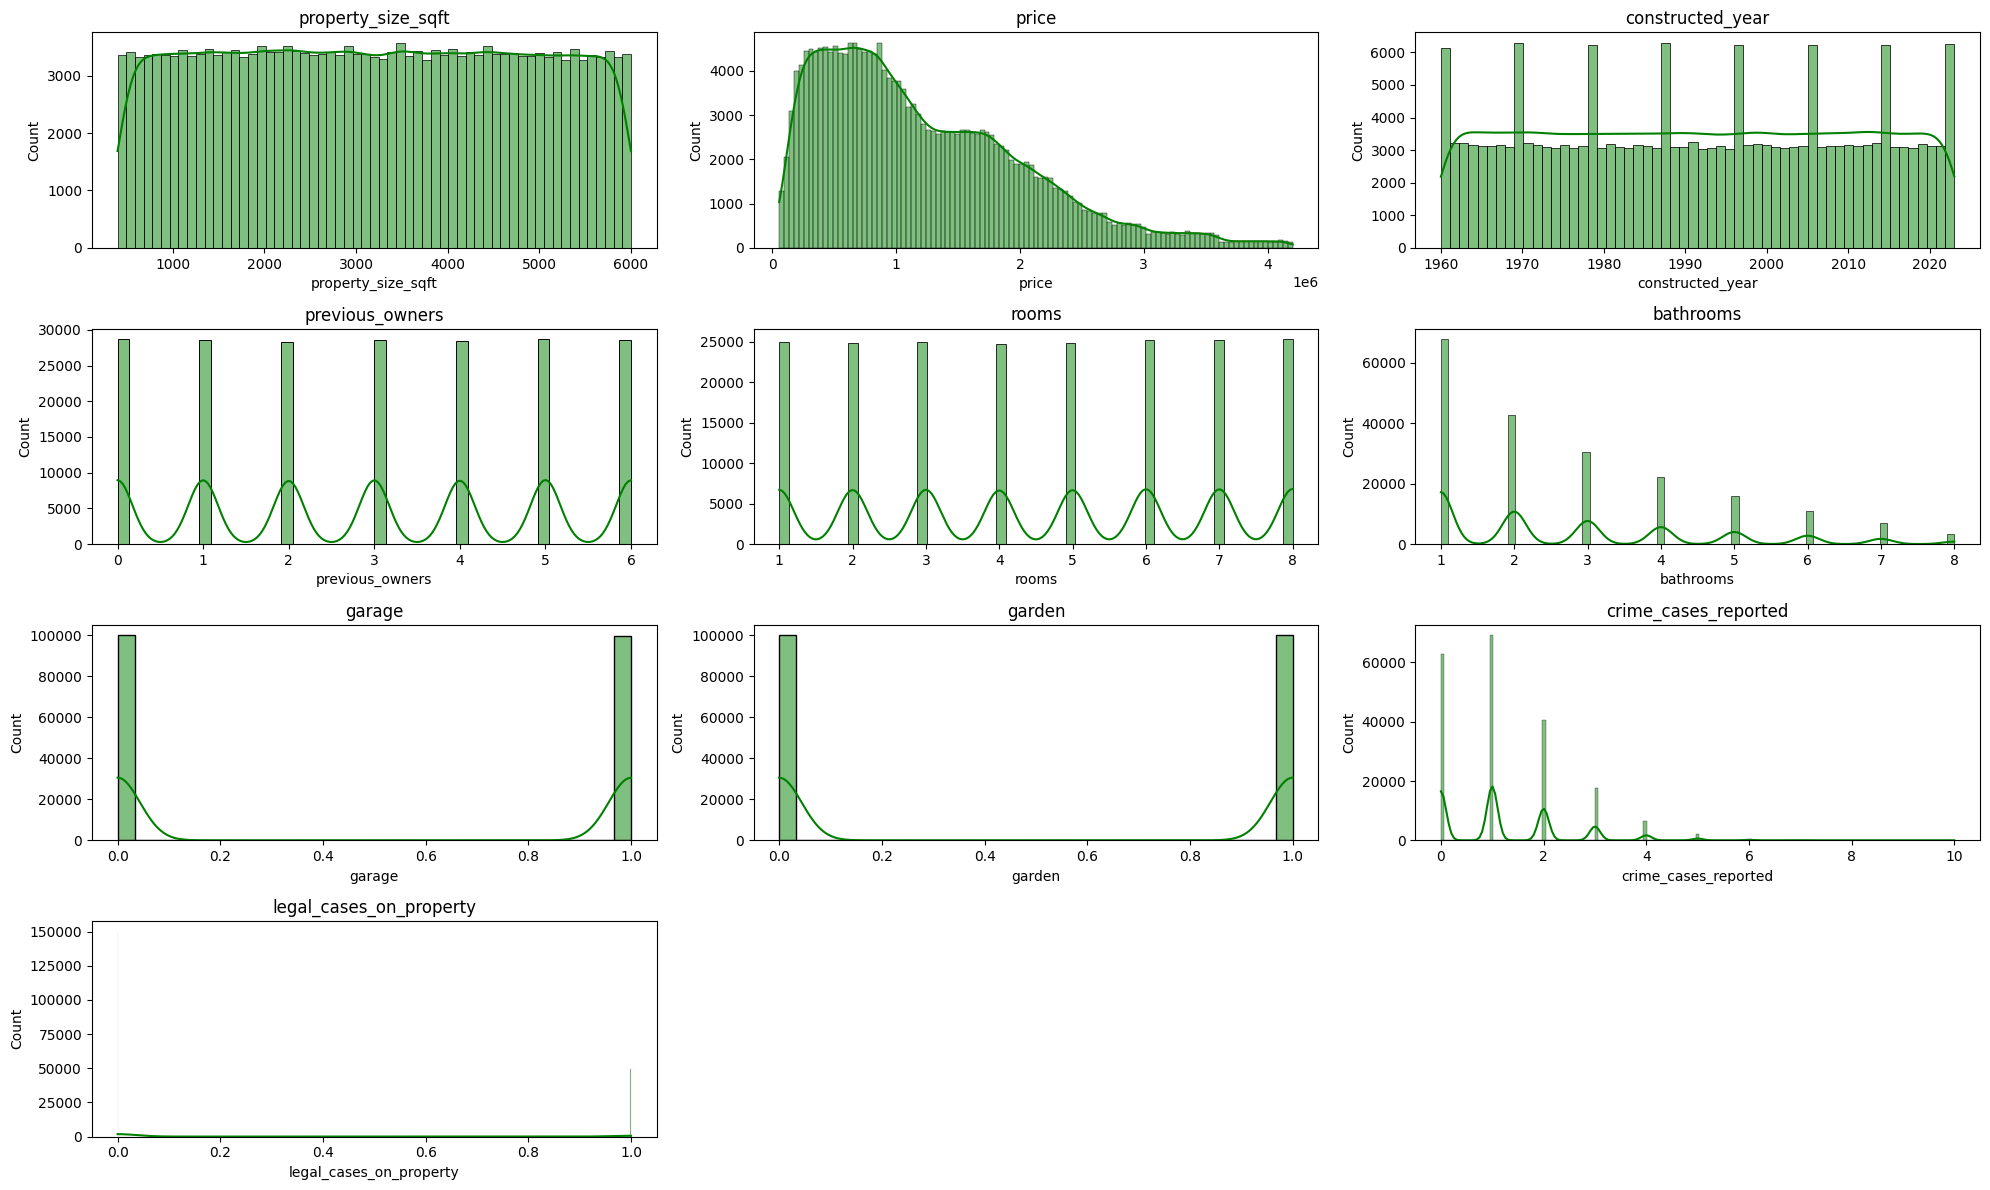

In [27]:
cols = [
    'property_size_sqft', 'price', 'constructed_year', 'previous_owners',
    'rooms', 'bathrooms', 'garage', 'garden',
    'crime_cases_reported', 'legal_cases_on_property'
]

plt.figure(figsize=(20, 12))

for i, col in enumerate(cols, 1):
    plt.subplot(4, 3, i)     # 4×3 grid = 12 slots (enough for 10)
    sns.histplot(data[col], kde=True,color="green")
    plt.xlabel(col)          # column name on x-axis
    plt.title(col)           # column name as title

plt.tight_layout()
plt.show()



Short observations :

- Property size is almost uniformly distributed across the range.
- Price is right-skewed, with most properties in the lower–mid price range and a long tail of expensive properties.
- Constructed year is fairly evenly spread from 1960 to recent years.
- Previous owners and rooms show discrete, evenly distributed counts.
- Bathrooms are skewed toward smaller numbers (1–3 bathrooms are most common).
- Garage and garden are binary features with roughly balanced presence.
- Crime cases reported is highly right-skewed; most properties have few or zero cases.
- Legal cases on property are rare, with the majority being zero.

# separate input and output

In [12]:
input_data=dataset.drop(columns="price")
output_data=dataset["price"]

# train_test_split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Split into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(input_data,output_data, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets (80% train, 20% val)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)


In [15]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)


(120000, 13)
(40000, 13)
(40000, 13)


# Feature Engineering

In [16]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,TargetEncoder
#from category_encoders.target_encoder import TargetEncoder


In [17]:
y_train = y_train.astype(float) + 1e-6



# apply target encoder

In [19]:
from sklearn.preprocessing import TargetEncoder

cols = ['country', 'city', 'property_type']

encoder = TargetEncoder()

x_train.loc[:, cols] = encoder.fit_transform(
    x_train[cols],
    y_train
)

x_test.loc[:, cols] = encoder.transform(
    x_test[cols]
)


In [ ]:
# apply OrdinalEncoderin furnishing status

In [21]:
# Initialize the OrdinalEncoder with the specified categories
encoder = OrdinalEncoder(categories=[['unfurnished', 'semi-furnished', 'fully-furnished']])

# Fit the encoder on the training set and transform the 'furnishing' column
x_train[['furnishing_status']] = encoder.fit_transform(x_train[['furnishing_status']])

# Transform the test set using the same fitted encoder
x_test[['furnishing_status']] = encoder.transform(x_test[['furnishing_status']])

In [22]:
x_train

,country,city,property_type,furnishing_status,property_size_sqft,constructed_year,previous_owners,rooms,bathrooms,garage,garden,crime_cases_reported,legal_cases_on_property
132890,1340307.08059,1355934.141739,1207257.992887,2.0,2405,1981,5,3,3,0,1,2,0
25126,950326.524753,945853.367356,1221862.869809,1.0,3870,1989,0,6,1,1,0,2,0
104767,1032971.73661,1034064.330046,1212225.210271,1.0,2991,1984,1,7,3,1,0,2,0
173116,1342195.180836,1352467.585002,1221260.14737,2.0,5674,1999,0,4,4,1,0,1,0
112716,1225486.083604,1224089.022676,1212225.210271,2.0,3870,1974,4,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115145,1025307.390277,1024869.421857,1219479.893826,2.0,3987,2017,3,1,1,0,0,1,0
128356,2226917.456624,2226917.456624,1217327.308882,2.0,4321,1989,5,5,3,1,1,0,1
186557,1445835.653346,1436982.240632,1199945.197349,0.0,4689,1999,0,8,4,1,0,1,0
34364,1116198.996963,1114197.454549,1211186.222555,0.0,5824,1970,0,3,2,0,0,2,0


# StandardScaler

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:


ss = StandardScaler()

# fit ONLY on train
x_train_scaled = pd.DataFrame(
    ss.fit_transform(x_train),
    columns=x_train.columns,
    index=x_train.index
)

# transform test using SAME scaler
x_test_scaled = pd.DataFrame(
    ss.transform(x_test),
    columns=x_test.columns,
    index=x_test.index
)


In [25]:
x_test_scaled

,country,city,property_type,furnishing_status,property_size_sqft,constructed_year,previous_owners,rooms,bathrooms,garage,garden,crime_cases_reported,legal_cases_on_property
119737,0.256544,0.236569,-0.773634,1.217253,0.786081,-0.458191,-1.496488,1.082496,1.216373,1.001668,0.996606,1.496046,1.733129
72272,-1.511880,-1.506322,0.519946,-0.006271,1.185932,1.164584,0.501315,1.082496,0.673131,-0.998335,0.996606,-0.192144,1.733129
158154,0.256544,0.236569,0.519946,1.217253,-1.144983,0.245011,-1.496488,1.518107,-0.956595,1.001668,-1.003406,-0.192144,-0.576991
65426,-1.316178,-1.315950,0.297014,-1.229794,0.669535,0.190919,0.501315,1.082496,0.129889,1.001668,-1.003406,0.651951,-0.576991
30074,-0.378812,-0.380637,0.936999,-1.229794,-1.396052,-1.269579,-1.496488,-0.659946,-0.413353,1.001668,0.996606,-1.036239,-0.576991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,0.256544,0.236569,0.936999,-0.006271,1.070626,0.136826,-0.997037,1.082496,-0.956595,-0.998335,0.996606,-0.192144,-0.576991
91537,-1.177688,-1.177110,-1.469452,-0.006271,1.067526,0.515474,1.500217,1.518107,2.846098,-0.998335,-1.003406,-1.036239,-0.576991
156449,2.074488,2.074020,0.297014,1.217253,-1.162341,-1.648227,0.501315,1.518107,-0.956595,1.001668,-1.003406,-1.036239,1.733129
184376,-0.531917,-0.503916,0.519946,-0.006271,0.950361,-0.728654,0.001865,-1.531168,-0.956595,1.001668,0.996606,-0.192144,-0.576991


#### import some libraries 

In [26]:
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
#from sklearn.ensemble import VotingRegressor
#from sklearn.model_selection import cross_val_score
#from mlxtend.feature_selection import SequentialFeatureSelector

# apply model & calculate MAE ,r2 score

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}
trained_models = {}

for name, model in models.items():
    # Train
    model.fit(x_train_scaled, y_train)
    trained_models[name] = model
    
    # Predictions
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred  = model.predict(x_test_scaled)

    # Train metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)

    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    print(f"\n{name}")
    print(f"Train R2: {train_r2:.4f} | Train MAE: {train_mae:.2f}")
    print(f"Test  R2: {test_r2:.4f} | Test  MAE: {test_mae:.2f}")



Linear Regression
Train R2: 0.9093 | Train MAE: 168905.81
Test  R2: 0.9091 | Test  MAE: 170296.69

Decision Tree
Train R2: 1.0000 | Train MAE: 0.00
Test  R2: 1.0000 | Test  MAE: 3469.42

Random Forest
Train R2: 1.0000 | Train MAE: 993.59
Test  R2: 1.0000 | Test  MAE: 2681.80


# prediction 

In [35]:
new_data = pd.DataFrame(
    [[0.256544,	0.236569,	-0.773634,	1.217253,	0.786081,	-0.458191,	
      -1.496488,	1.082496,	1.216373,	1.001668,	0.996606,	1.496046,	1.733129]],
    columns=x_train_scaled.columns
)

price = trained_models["Linear Regression"].predict(new_data)
print(price[0])


1822545.1584377768


In [ ]:
1869935